In [1]:
import os
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [2]:
latest_date = '20230912'

In [3]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [4]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [5]:
len(df_kospi)

950

In [6]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 005930 to 001525
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      950 non-null    int64
 1   시가총액    950 non-null    int64
 2   거래량     950 non-null    int64
 3   거래대금    950 non-null    int64
 4   상장주식수   950 non-null    int64
dtypes: int64(5)
memory usage: 44.5+ KB


In [7]:
csv_file_name = f'kospi_stock_{latest_date}.csv'

In [8]:
#주가 펀더멘탈 정보 가져 오기
df_kospi_target = None
start_time = time.time()
#for idx, ticker in enumerate(df_kospi.head(10).index):
for idx, ticker in enumerate(df_kospi.index):
    #print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    #isplay(df_stock_fundamental)
    if not os.path.exists(csv_file_name):
        #df_kospi_target = df_stock_fundamental
        df_stock_fundamental.to_csv(csv_file_name, mode='w', index=False)
    else:
        #df_kospi_target = pd.concat([df_kospi_target, df_stock_fundamental])
        df_stock_fundamental.to_csv(csv_file_name, mode='a', header=False, index=False)
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)



**************************************************
소요 시간: 1085 seconds
**************************************************


# load kospi data from csv file

In [9]:
df = pd.read_csv(csv_file_name)
df

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
1,LG에너지솔루션,80052.0,151.85,6.27,3306.0,0.00,0.0
2,SK하이닉스,92004.0,35.84,1.26,3242.0,1.03,1200.0
3,삼성바이오로직스,126233.0,63.36,5.74,11442.0,0.00,0.0
4,삼성전자우,0.0,0.00,0.00,0.0,2.53,1445.0
...,...,...,...,...,...,...,...
945,유유제약2우B,0.0,0.00,0.00,0.0,0.96,110.0
946,진흥기업우B,0.0,0.00,0.00,0.0,0.00,0.0
947,동양2우B,0.0,0.00,0.00,0.0,1.42,150.0
948,진흥기업2우B,0.0,0.00,0.00,0.0,0.00,0.0


In [10]:
# 지표 중 0 값을 가진 주식 제거
df_div = df[(df==0).sum(1) < 1]
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
2,SK하이닉스,92004.0,35.84,1.26,3242.0,1.03,1200.0
5,POSCO홀딩스,692323.0,13.27,0.79,41456.0,2.18,12000.0
6,현대차,407147.0,6.54,0.46,28521.0,3.75,7000.0
7,LG화학,445524.0,23.57,1.25,23670.0,1.79,10000.0
...,...,...,...,...,...,...,...
871,모두투어리츠,NaN,NaN,NaN,NaN,NaN,NaN
883,한솔PNS,2311.0,15.42,0.61,92.0,1.76,25.0
886,SHD,42355.0,2.61,0.55,8905.0,0.43,100.0
887,진도,8369.0,6.10,0.27,367.0,3.13,70.0


In [11]:
# 결측치를 가진 주식 제거
df_div = df_div.dropna()
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
2,SK하이닉스,92004.0,35.84,1.26,3242.0,1.03,1200.0
5,POSCO홀딩스,692323.0,13.27,0.79,41456.0,2.18,12000.0
6,현대차,407147.0,6.54,0.46,28521.0,3.75,7000.0
7,LG화학,445524.0,23.57,1.25,23670.0,1.79,10000.0
...,...,...,...,...,...,...,...
865,성문전자,1756.0,14.38,0.92,112.0,0.31,5.0
866,경인전자,49149.0,10.77,0.46,2080.0,1.56,350.0
883,한솔PNS,2311.0,15.42,0.61,92.0,1.76,25.0
886,SHD,42355.0,2.61,0.55,8905.0,0.43,100.0


In [12]:
# 배당률 기준 내림차순 정렬
df_div= df_div.sort_values(by=['DIV'], ascending=False )
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
417,일성신약,60174.0,1.53,0.36,14122.0,18.54,4005.0
186,LX인터내셔널,62867.0,2.03,0.46,14325.0,10.29,3000.0
517,금호건설,15149.0,8.93,0.35,587.0,9.54,500.0
37,우리금융지주,39505.0,2.87,0.30,4191.0,9.41,1130.0
282,바이오노트,15707.0,1.59,0.33,3277.0,9.40,490.0
...,...,...,...,...,...,...,...
196,후성,3882.0,10.45,2.82,1047.0,0.18,20.0
8,삼성SDI,251948.0,19.22,2.23,29191.0,0.18,1030.0
82,한미약품,70131.0,46.40,4.40,6648.0,0.16,500.0
14,카카오,22893.0,15.60,2.12,3106.0,0.12,60.0


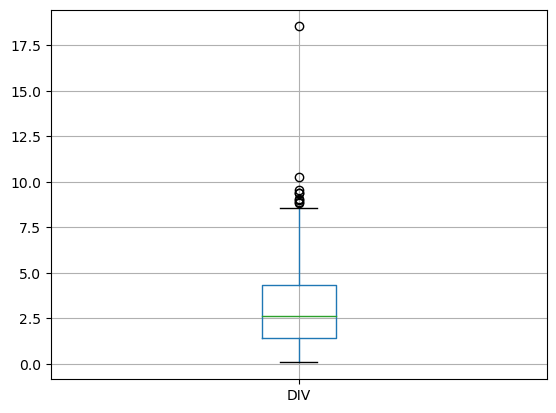

In [13]:
#df_div.boxplot(column=['PER', 'PBR', 'DIV'])
df_div.boxplot(column=['DIV'])
plt.show()

In [32]:
df_div.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,4.970000e+02,497.000000,497.000000,497.000000,497.000000,497.000000
mean,8.085374e+04,18.007565,0.942736,6852.808853,3.105634,1159.297787
std,2.622043e+05,33.214850,1.323447,22405.537764,2.234320,2130.991563
min,8.080000e+02,0.400000,0.120000,15.000000,0.080000,5.000000
25%,1.089200e+04,4.930000,0.370000,646.000000,1.400000,150.000000
50%,2.608800e+04,9.300000,0.560000,2080.000000,2.660000,490.000000
75%,6.969800e+04,15.570000,1.090000,6015.000000,4.320000,1200.000000
max,4.906107e+06,301.920000,14.560000,406090.000000,18.540000,20000.000000


In [34]:
df_kospi_div_top100 = df_div.head(100)
df_kospi_div_top100

,Name,BPS,PER,PBR,EPS,DIV,DPS
417,일성신약,60174.0,1.53,0.36,14122.0,18.54,4005.0
186,LX인터내셔널,62867.0,2.03,0.46,14325.0,10.29,3000.0
517,금호건설,15149.0,8.93,0.35,587.0,9.54,500.0
37,우리금융지주,39505.0,2.87,0.30,4191.0,9.41,1130.0
282,바이오노트,15707.0,1.59,0.33,3277.0,9.40,490.0
...,...,...,...,...,...,...,...
633,유화증권,10892.0,33.51,0.21,67.0,4.90,110.0
167,하이트진로,16906.0,15.57,1.15,1250.0,4.88,950.0
467,삼영무역,26238.0,4.04,0.47,3054.0,4.86,600.0
651,인천도시가스,48520.0,8.69,0.53,2956.0,4.86,1250.0


In [36]:
#kospi_div_top100_{latest_date}.csv
kospi_div_top_100_filename = f'kospi_div_top100_{latest_date}.csv'
df_kospi_div_top100.to_csv(kospi_div_top_100_filename, index=False)

In [37]:
df_kospi_div_top100 = pd.read_csv(kospi_div_top_100_filename)

In [38]:
df_kospi_div_top100 = df_kospi_div_top100.drop(columns=['BPS'])

In [48]:
df_kospi_div_top100 = df_kospi_div_top100.drop(columns=['DPS'])

In [45]:
df_kospi_div_top100.index = df_kospi_div_top100['Name']
df_kospi_div_top100 =  df_kospi_div_top100.drop(columns=['Name'])

In [46]:
df_kospi_div_top100

,PER,PBR,EPS,DIV,DPS
Name,,,,,
일성신약,1.53,0.36,14122.0,18.54,4005.0
LX인터내셔널,2.03,0.46,14325.0,10.29,3000.0
금호건설,8.93,0.35,587.0,9.54,500.0
우리금융지주,2.87,0.30,4191.0,9.41,1130.0
바이오노트,1.59,0.33,3277.0,9.40,490.0
...,...,...,...,...,...
유화증권,33.51,0.21,67.0,4.90,110.0
하이트진로,15.57,1.15,1250.0,4.88,950.0
삼영무역,4.04,0.47,3054.0,4.86,600.0


# FIN

In [49]:
df_kospi_div_top100.iloc[0:30]

,PER,PBR,EPS,DIV
Name,,,,
일성신약,1.53,0.36,14122.0,18.54
LX인터내셔널,2.03,0.46,14325.0,10.29
금호건설,8.93,0.35,587.0,9.54
우리금융지주,2.87,0.30,4191.0,9.41
바이오노트,1.59,0.33,3277.0,9.40
BNK금융지주,2.87,0.23,2404.0,9.06
GS건설,3.61,0.25,3997.0,9.02
동아타이어,6.43,0.41,1747.0,8.90
기업은행,3.28,0.30,3320.0,8.82


In [50]:
df_kospi_div_top100.iloc[30:60]

,PER,PBR,EPS,DIV
Name,,,,
휴스틸,0.89,0.31,5675.0,6.93
NH투자증권,11.49,0.46,881.0,6.92
유수홀딩스,4.76,0.42,1218.0,6.90
부국증권,4.66,0.19,4736.0,6.80
SK텔레콤,11.87,0.94,4118.0,6.79
케이카,17.80,2.20,631.0,6.77
세아특수강,6.79,0.37,2185.0,6.74
아이마켓코리아,12.80,0.79,706.0,6.64
HS애드,5.61,0.55,1077.0,6.62


In [51]:
df_kospi_div_top100.iloc[60:]

,PER,PBR,EPS,DIV
Name,,,,
KCC글라스,6.91,0.45,5894.0,5.90
HDC현대산업개발,13.35,0.23,764.0,5.88
롯데지주,10.70,0.25,2387.0,5.87
자이에스앤디,2.09,0.40,2447.0,5.86
대한제강,2.03,0.35,6605.0,5.83
하이트진로홀딩스,6.01,0.33,1427.0,5.83
HDC랩스,14.41,0.68,538.0,5.81
현대홈쇼핑,5.95,0.26,7541.0,5.79
한국앤컴퍼니,6.43,0.28,1749.0,5.78


In [ ]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

In [ ]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

In [ ]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [ ]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

In [ ]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

In [ ]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [ ]:
"""
FIN
"""